In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/data_updated_2022_2023.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11967 entries, 0 to 11966
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LastName     11959 non-null  object 
 1   FirstName    11949 non-null  object 
 2   Gender       11967 non-null  object 
 3   Country      11755 non-null  object 
 4   Date         11967 non-null  object 
 5   Competition  11967 non-null  object 
 6   Round        11967 non-null  object 
 7   Location     11967 non-null  object 
 8   Apparatus    11967 non-null  object 
 9   Rank         11717 non-null  float64
 10  D_Score      11810 non-null  float64
 11  E_Score      11735 non-null  float64
 12  Penalty      2807 non-null   float64
 13  Score        11808 non-null  float64
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


In [8]:
old = pd.read_csv("../data/data_2022_2023.csv")

In [9]:
old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12676 entries, 0 to 12675
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LastName     12668 non-null  object 
 1   FirstName    12639 non-null  object 
 2   Gender       12676 non-null  object 
 3   Country      12464 non-null  object 
 4   Date         12676 non-null  object 
 5   Competition  12676 non-null  object 
 6   Round        12676 non-null  object 
 7   Location     12676 non-null  object 
 8   Apparatus    12676 non-null  object 
 9   Rank         12433 non-null  float64
 10  D_Score      12526 non-null  float64
 11  E_Score      12451 non-null  float64
 12  Penalty      2869 non-null   float64
 13  Score        12524 non-null  float64
dtypes: float64(5), object(9)
memory usage: 1.4+ MB


## change_log

    Removed duplicates for qual and AAqual for 2022 world championships, Liverpool. I included VT1 pages into m/w_qual_VT.pdf files before dropping All-Around qualification entries, so it won't lose any information.

    Changed all RG into SR, by editing in combine.R file.

    For Oceania Continental Championships 2023, change 'Australia' into 'AUS', 'New Zealand' into 'NZL'.

    Modified date and comma for BIRMINGHAM 2022 Commonwealth Games. It was a typo.

    Removed 10th from competition name of 2023 10th Senior European Championships, so the competition name will align with that of 2022.

    Changed incorrect (ASCII?) characters into - in the dates of Baku and Cairo World Cup. That ASCII was caused by using a 'dash' in the Chinese input method.

    For 2022 51st FIG Artistic Gymnastics World Championships and 2023 Central American and Caribbean Games, make the Competition name include the year.

    Changed 'BRN' into 'GBR' for the 2023 and 2022 British championships.

    Changed competition name 'FISH World University Games' into 'FISU World University Games.


In [13]:
women = df[df["Gender"]=="w"]

In [14]:
women.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4715 entries, 98 to 11966
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LastName     4707 non-null   object 
 1   FirstName    4713 non-null   object 
 2   Gender       4715 non-null   object 
 3   Country      4646 non-null   object 
 4   Date         4715 non-null   object 
 5   Competition  4715 non-null   object 
 6   Round        4715 non-null   object 
 7   Location     4715 non-null   object 
 8   Apparatus    4715 non-null   object 
 9   Rank         4676 non-null   float64
 10  D_Score      4670 non-null   float64
 11  E_Score      4615 non-null   float64
 12  Penalty      1248 non-null   float64
 13  Score        4670 non-null   float64
dtypes: float64(5), object(9)
memory usage: 552.5+ KB


In [15]:
df.drop_duplicates(inplace=True)
df['Name'] = df['FirstName'] + " " + df['LastName']
df = df.drop(columns=["LastName", "FirstName"])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
fill_columns = ['Rank', 'D_Score', 'E_Score', 'Score']


/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_23498/2407283437.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11967 entries, 0 to 11966
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       11967 non-null  object        
 1   Country      11755 non-null  object        
 2   Date         9507 non-null   datetime64[ns]
 3   Competition  11967 non-null  object        
 4   Round        11967 non-null  object        
 5   Location     11967 non-null  object        
 6   Apparatus    11967 non-null  object        
 7   Rank         11717 non-null  float64       
 8   D_Score      11810 non-null  float64       
 9   E_Score      11735 non-null  float64       
 10  Penalty      2807 non-null   float64       
 11  Score        11808 non-null  float64       
 12  Name         11941 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.2+ MB


In [17]:
df[fill_columns] = df[fill_columns].fillna(0)
df["Penalty"] = df["Penalty"].fillna(0)
df['Total_Score'] = df['D_Score'] + df['E_Score'] - df['Penalty']
df

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
0,m,NOR,2023-02-26 20:23:00,FIG Apparatus World Cup 2023,qual,"Cottbus, Germany",HB,39.0,4.6,6.700,0.0,11.300,Fredrik AAS,11.300
1,m,NOR,2023-02-26 20:23:00,FIG Apparatus World Cup 2023,qual,"Cottbus, Germany",PH,44.0,4.4,7.800,0.0,12.200,Fredrik AAS,12.200
2,m,NOR,2001-08-05 20:23:00,2023 FISU World University Games,qual,"Chengdu, China",FX,54.0,4.0,8.566,0.0,12.566,Fredrik Bjornevik AAS,12.566
3,m,NOR,2001-08-05 20:23:00,2023 FISU World University Games,qual,"Chengdu, China",HB,44.0,4.6,8.166,0.0,12.766,Fredrik Bjornevik AAS,12.766
4,m,NOR,2001-08-05 20:23:00,2023 FISU World University Games,qual,"Chengdu, China",PB,54.0,4.4,8.066,0.0,12.466,Fredrik Bjornevik AAS,12.466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11962,w,AUS,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",UB,17.0,5.6,8.466,0.0,14.066,NaN,14.066
11963,w,AUS,NaT,BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",BB,1.0,5.1,8.366,0.0,13.466,NaN,13.466
11964,w,AUS,NaT,BIRMINGHAM 2022 Commonwealth Games,qual,"Birmingham, England",BB,5.0,5.0,7.950,0.0,12.950,NaN,12.950
11965,w,AUS,NaT,BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",UB,7.0,5.3,7.233,0.0,12.533,NaN,12.533


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11967 entries, 0 to 11966
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       11967 non-null  object        
 1   Country      11755 non-null  object        
 2   Date         9507 non-null   datetime64[ns]
 3   Competition  11967 non-null  object        
 4   Round        11967 non-null  object        
 5   Location     11967 non-null  object        
 6   Apparatus    11967 non-null  object        
 7   Rank         11967 non-null  float64       
 8   D_Score      11967 non-null  float64       
 9   E_Score      11967 non-null  float64       
 10  Penalty      11967 non-null  float64       
 11  Score        11967 non-null  float64       
 12  Name         11941 non-null  object        
 13  Total_Score  11967 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 1.3+ MB


In [21]:
wdate = women["Date"]
women["Date"]= pd.to_datetime(wdate)

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_23498/3460621686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women["Date"]= pd.to_datetime(wdate)


In [22]:
women.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4715 entries, 98 to 11966
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   LastName     4707 non-null   object        
 1   FirstName    4713 non-null   object        
 2   Gender       4715 non-null   object        
 3   Country      4646 non-null   object        
 4   Date         3732 non-null   datetime64[ns]
 5   Competition  4715 non-null   object        
 6   Round        4715 non-null   object        
 7   Location     4715 non-null   object        
 8   Apparatus    4715 non-null   object        
 9   Rank         4676 non-null   float64       
 10  D_Score      4670 non-null   float64       
 11  E_Score      4615 non-null   float64       
 12  Penalty      1248 non-null   float64       
 13  Score        4670 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(8)
memory usage: 552.5+ KB


In [24]:
women["Date"].unique()

<DatetimeArray>
[                'NaT', '2009-03-12 20:23:00', '2027-04-30 20:23:00',
 '2001-03-04 20:23:00', '2024-03-27 20:22:00', '2011-08-14 20:22:00',
 '2023-03-26 20:23:00', '2011-04-16 20:23:00', '2025-05-28 20:23:00',
 '2001-08-05 20:23:00', '2023-02-26 20:23:00', '2024-06-28 20:23:00',
 '2001-06-04 20:23:00', '2017-03-19 20:23:00', '2008-06-11 20:23:00']
Length: 15, dtype: datetime64[ns]

In [28]:
df["Location"].unique()

array(['Cottbus, Germany', 'Chengdu, China', 'Liverpool, England',
       'Munich, Germany', 'Antalya, Turkey', 'Baku, Azerbaijan',
       'Cairo, Egypt', 'Doha, Qatar', 'Varna, Bulgaria',
       'Birmingham, England', 'San Salvador, El Salvador',
       'Stuttgart, Germany', 'Tel Aviv, Israel', 'Osijek, Croatia.',
       'Carrara, Australia'], dtype=object)

In [29]:
df["Apparatus"].unique()

array(['HB', 'PH', 'FX', 'PB', 'SR', 'VT1', 'VT', 'VT_1', 'VT_2', 'BB',
       'UB', 'VT2', 'hb'], dtype=object)

In [36]:
# Values you want to select
selected_values = ['VT1', 'VT', 'VT_1', 'VT_2', 'VT2']

# Create a new DataFrame containing only the selected values in the "Apparatus" column
new_df = df[df['Apparatus'].isin(selected_values)]

new_df

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
7,m,NOR,2001-08-05 20:23:00,2023 FISU World University Games,qual,"Chengdu, China",VT1,69.0,4.0,8.966,0.0,12.966,Fredrik Bjornevik AAS,12.966
18,m,ESP,NaT,2022 51st FIG Artistic Gymnastics World Champi...,AAfinal,"Liverpool, England",VT,20.0,4.8,9.033,0.1,13.733,Nestor ABAD,13.733
19,m,ESP,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",VT1,97.0,4.8,9.000,0.3,13.500,Nestor ABAD,13.500
28,m,ESP,2018-08-21 20:22:00,2022 Senior European Championships,qual,"Munich, Germany",VT1,36.0,5.2,9.200,0.3,14.100,Nestor ABAD,14.100
40,m,ESP,2011-04-16 20:23:00,2023 Senior European Championships,AAfinal,"Antalya, Turkey",VT1,22.0,5.2,7.900,0.1,13.000,Nestor ABAD,13.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11942,m,NaN,2008-06-11 20:23:00,2023 Osijek Challenge Cup,qual,"Osijek, Croatia.",VT1,7.0,5.2,8.850,0.0,14.050,Bozhidar Zlatanov,14.050
11943,m,NaN,2008-06-11 20:23:00,2023 Osijek Challenge Cup,final,"Osijek, Croatia.",VT2,6.0,4.8,8.966,0.0,13.766,Bozhidar Zlatanov,13.766
11944,m,NaN,2008-06-11 20:23:00,2023 Osijek Challenge Cup,qual,"Osijek, Croatia.",VT2,7.0,4.8,9.000,0.0,13.800,Bozhidar Zlatanov,13.800
11959,w,SUI,2025-05-28 20:23:00,2023 Varna World Challenge Cup Results,final,"Varna, Bulgaria",VT1,8.0,3.6,8.733,0.0,12.333,NaN,12.333


In [41]:
new_df["Apparatus"].value_counts()

Apparatus
VT1     1709
VT2      834
VT_1     134
VT_2     133
VT       124
Name: count, dtype: int64

In [38]:
justvt = new_df[new_df["Apparatus"]=="VT"]


In [42]:
justvt_1 = new_df[new_df["Apparatus"]=="VT_1"]
justvt_2 = new_df[new_df["Apparatus"]=="VT_2"]


In [39]:
justvt["Location"].unique()

array(['Liverpool, England', 'Birmingham, England', 'Chengdu, China',
       'Carrara, Australia'], dtype=object)

In [43]:
justvt_1["Location"].unique()

array(['Cairo, Egypt', 'Baku, Azerbaijan'], dtype=object)

In [44]:
justvt_2["Location"].unique()

array(['Cairo, Egypt', 'Baku, Azerbaijan'], dtype=object)

In [45]:
justvt1 = new_df[new_df["Apparatus"]=="VT1"]
justvt2 = new_df[new_df["Apparatus"]=="VT2"]


In [46]:
justvt1["Location"].unique()

array(['Chengdu, China', 'Liverpool, England', 'Munich, Germany',
       'Antalya, Turkey', 'Birmingham, England',
       'San Salvador, El Salvador', 'Cottbus, Germany', 'Varna, Bulgaria',
       'Stuttgart, Germany', 'Doha, Qatar', 'Osijek, Croatia.',
       'Tel Aviv, Israel'], dtype=object)

In [47]:
justvt2["Location"].unique()

array(['Liverpool, England', 'Birmingham, England', 'Cottbus, Germany',
       'Varna, Bulgaria', 'Munich, Germany', 'Antalya, Turkey',
       'Chengdu, China', 'Stuttgart, Germany', 'Doha, Qatar',
       'San Salvador, El Salvador', 'Osijek, Croatia.',
       'Tel Aviv, Israel'], dtype=object)

In [48]:
new_df

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
7,m,NOR,2001-08-05 20:23:00,2023 FISU World University Games,qual,"Chengdu, China",VT1,69.0,4.0,8.966,0.0,12.966,Fredrik Bjornevik AAS,12.966
18,m,ESP,NaT,2022 51st FIG Artistic Gymnastics World Champi...,AAfinal,"Liverpool, England",VT,20.0,4.8,9.033,0.1,13.733,Nestor ABAD,13.733
19,m,ESP,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",VT1,97.0,4.8,9.000,0.3,13.500,Nestor ABAD,13.500
28,m,ESP,2018-08-21 20:22:00,2022 Senior European Championships,qual,"Munich, Germany",VT1,36.0,5.2,9.200,0.3,14.100,Nestor ABAD,14.100
40,m,ESP,2011-04-16 20:23:00,2023 Senior European Championships,AAfinal,"Antalya, Turkey",VT1,22.0,5.2,7.900,0.1,13.000,Nestor ABAD,13.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11942,m,NaN,2008-06-11 20:23:00,2023 Osijek Challenge Cup,qual,"Osijek, Croatia.",VT1,7.0,5.2,8.850,0.0,14.050,Bozhidar Zlatanov,14.050
11943,m,NaN,2008-06-11 20:23:00,2023 Osijek Challenge Cup,final,"Osijek, Croatia.",VT2,6.0,4.8,8.966,0.0,13.766,Bozhidar Zlatanov,13.766
11944,m,NaN,2008-06-11 20:23:00,2023 Osijek Challenge Cup,qual,"Osijek, Croatia.",VT2,7.0,4.8,9.000,0.0,13.800,Bozhidar Zlatanov,13.800
11959,w,SUI,2025-05-28 20:23:00,2023 Varna World Challenge Cup Results,final,"Varna, Bulgaria",VT1,8.0,3.6,8.733,0.0,12.333,NaN,12.333


In [49]:
# Replace "VT_1" with "VT1" and "VT_2" with "VT2" in the "Apparatus" column
new_df['Apparatus'] = new_df['Apparatus'].replace({'VT_1': 'VT1', 'VT_2': 'VT2'})



/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_23498/1797523781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Apparatus'] = new_df['Apparatus'].replace({'VT_1': 'VT1', 'VT_2': 'VT2'})


In [51]:
new_df["Apparatus"].value_counts()

Apparatus
VT1    1843
VT2     967
VT      124
Name: count, dtype: int64

In [52]:
df['Apparatus'] = df['Apparatus'].replace({'VT_1': 'VT1', 'VT_2': 'VT2'})


In [57]:
df["Apparatus"].value_counts()

Apparatus
BB     1158
UB     1085
FX     1081
VT1     881
VT2     451
VT       59
Name: count, dtype: int64

In [56]:
df = df[df["Gender"]=="w"]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4715 entries, 98 to 11966
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       4715 non-null   object        
 1   Country      4646 non-null   object        
 2   Date         3732 non-null   datetime64[ns]
 3   Competition  4715 non-null   object        
 4   Round        4715 non-null   object        
 5   Location     4715 non-null   object        
 6   Apparatus    4715 non-null   object        
 7   Rank         4715 non-null   float64       
 8   D_Score      4715 non-null   float64       
 9   E_Score      4715 non-null   float64       
 10  Penalty      4715 non-null   float64       
 11  Score        4715 non-null   float64       
 12  Name         4705 non-null   object        
 13  Total_Score  4715 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 552.5+ KB


In [61]:
df=df.drop_duplicates()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4715 entries, 98 to 11966
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       4715 non-null   object        
 1   Country      4646 non-null   object        
 2   Date         3732 non-null   datetime64[ns]
 3   Competition  4715 non-null   object        
 4   Round        4715 non-null   object        
 5   Location     4715 non-null   object        
 6   Apparatus    4715 non-null   object        
 7   Rank         4715 non-null   float64       
 8   D_Score      4715 non-null   float64       
 9   E_Score      4715 non-null   float64       
 10  Penalty      4715 non-null   float64       
 11  Score        4715 non-null   float64       
 12  Name         4705 non-null   object        
 13  Total_Score  4715 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 552.5+ KB


In [63]:
df.describe(include=object)

,Gender,Country,Competition,Round,Location,Apparatus,Name
count,4715,4646,4715,4715,4715,4715,4705
unique,1,83,15,4,14,6,629
top,w,GBR,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",BB,Alice KINSELLA
freq,4715,657,750,3627,1284,1158,45


In [65]:
df["Round"].value_counts()

Round
qual         3627
final         575
AAfinal       417
TeamFinal      96
Name: count, dtype: int64

In [67]:
df.head()

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
98,w,EGY,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",BB,100.0,4.8,6.200,0.0,11.000,Jana ABDELSALAM,11.000
99,w,EGY,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",FX,109.0,4.4,7.466,0.1,11.766,Jana ABDELSALAM,11.766
100,w,EGY,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",UB,52.0,4.8,8.000,0.0,12.800,Jana ABDELSALAM,12.800
101,w,EGY,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",VT1,110.0,4.2,8.433,0.3,12.333,Jana ABDELSALAM,12.333
102,w,EGY,2009-03-12 20:23:00,World Cup,qual,"Baku, Azerbaijan",BB,22.0,4.8,6.733,0.0,11.533,Jana ABDELSALAM,11.533


In [66]:
df.columns

Index(['Gender', 'Country', 'Date', 'Competition', 'Round', 'Location',
       'Apparatus', 'Rank', 'D_Score', 'E_Score', 'Penalty', 'Score', 'Name',
       'Total_Score'],
      dtype='object')

In [68]:
new_order = ['Country','Name','Gender', 'Date', 'Competition', 'Round', 'Location',
       'Apparatus', 'Rank', 'D_Score', 'E_Score', 'Penalty', 'Score', 
       'Total_Score']

df = df[new_order]

df

,Country,Name,Gender,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Total_Score
98,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",BB,100.0,4.8,6.200,0.0,11.000,11.000
99,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",FX,109.0,4.4,7.466,0.1,11.766,11.766
100,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",UB,52.0,4.8,8.000,0.0,12.800,12.800
101,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",VT1,110.0,4.2,8.433,0.3,12.333,12.333
102,EGY,Jana ABDELSALAM,w,2009-03-12 20:23:00,World Cup,qual,"Baku, Azerbaijan",BB,22.0,4.8,6.733,0.0,11.533,11.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11962,AUS,NaN,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",UB,17.0,5.6,8.466,0.0,14.066,14.066
11963,AUS,NaN,w,NaT,BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",BB,1.0,5.1,8.366,0.0,13.466,13.466
11964,AUS,NaN,w,NaT,BIRMINGHAM 2022 Commonwealth Games,qual,"Birmingham, England",BB,5.0,5.0,7.950,0.0,12.950,12.950
11965,AUS,NaN,w,NaT,BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",UB,7.0,5.3,7.233,0.0,12.533,12.533


In [69]:
df = df.drop(columns=["Total_Score"])

In [70]:
df

,Country,Name,Gender,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
98,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",BB,100.0,4.8,6.200,0.0,11.000
99,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",FX,109.0,4.4,7.466,0.1,11.766
100,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",UB,52.0,4.8,8.000,0.0,12.800
101,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",VT1,110.0,4.2,8.433,0.3,12.333
102,EGY,Jana ABDELSALAM,w,2009-03-12 20:23:00,World Cup,qual,"Baku, Azerbaijan",BB,22.0,4.8,6.733,0.0,11.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11962,AUS,NaN,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",UB,17.0,5.6,8.466,0.0,14.066
11963,AUS,NaN,w,NaT,BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",BB,1.0,5.1,8.366,0.0,13.466
11964,AUS,NaN,w,NaT,BIRMINGHAM 2022 Commonwealth Games,qual,"Birmingham, England",BB,5.0,5.0,7.950,0.0,12.950
11965,AUS,NaN,w,NaT,BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",UB,7.0,5.3,7.233,0.0,12.533


In [71]:
%matplotlib inline

In [73]:
# Calculate the 10th percentile value
percentile_10 = df['Score'].quantile(0.10)

# Remove outliers (values below the 10th percentile)
df_cleaned = df[df['Score'] >= percentile_10]
df_cleaned

,Country,Name,Gender,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
98,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",BB,100.0,4.8,6.200,0.0,11.000
99,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",FX,109.0,4.4,7.466,0.1,11.766
100,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",UB,52.0,4.8,8.000,0.0,12.800
101,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",VT1,110.0,4.2,8.433,0.3,12.333
102,EGY,Jana ABDELSALAM,w,2009-03-12 20:23:00,World Cup,qual,"Baku, Azerbaijan",BB,22.0,4.8,6.733,0.0,11.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11962,AUS,NaN,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",UB,17.0,5.6,8.466,0.0,14.066
11963,AUS,NaN,w,NaT,BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",BB,1.0,5.1,8.366,0.0,13.466
11964,AUS,NaN,w,NaT,BIRMINGHAM 2022 Commonwealth Games,qual,"Birmingham, England",BB,5.0,5.0,7.950,0.0,12.950
11965,AUS,NaN,w,NaT,BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",UB,7.0,5.3,7.233,0.0,12.533


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4715 entries, 98 to 11966
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      4646 non-null   object        
 1   Name         4705 non-null   object        
 2   Gender       4715 non-null   object        
 3   Date         3732 non-null   datetime64[ns]
 4   Competition  4715 non-null   object        
 5   Round        4715 non-null   object        
 6   Location     4715 non-null   object        
 7   Apparatus    4715 non-null   object        
 8   Rank         4715 non-null   float64       
 9   D_Score      4715 non-null   float64       
 10  E_Score      4715 non-null   float64       
 11  Penalty      4715 non-null   float64       
 12  Score        4715 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 515.7+ KB


In [75]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4249 entries, 98 to 11966
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      4188 non-null   object        
 1   Name         4239 non-null   object        
 2   Gender       4249 non-null   object        
 3   Date         3344 non-null   datetime64[ns]
 4   Competition  4249 non-null   object        
 5   Round        4249 non-null   object        
 6   Location     4249 non-null   object        
 7   Apparatus    4249 non-null   object        
 8   Rank         4249 non-null   float64       
 9   D_Score      4249 non-null   float64       
 10  E_Score      4249 non-null   float64       
 11  Penalty      4249 non-null   float64       
 12  Score        4249 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 464.7+ KB


In [78]:
df['Country'].isnull().sum()

69

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df_cleaned.head(1)

,Country,Name,Gender,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
98,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",BB,100.0,4.8,6.2,0.0,11.0


In [87]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4249 entries, 98 to 11966
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      4188 non-null   object        
 1   Name         4239 non-null   object        
 2   Gender       4249 non-null   object        
 3   Date         3344 non-null   datetime64[ns]
 4   Competition  4249 non-null   object        
 5   Round        4249 non-null   object        
 6   Location     4249 non-null   object        
 7   Apparatus    4249 non-null   object        
 8   Rank         4249 non-null   float64       
 9   D_Score      4249 non-null   float64       
 10  E_Score      4249 non-null   float64       
 11  Penalty      4249 non-null   float64       
 12  Score        4249 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 464.7+ KB


In [90]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4249 entries, 98 to 11966
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      4188 non-null   object        
 1   Name         4239 non-null   object        
 2   Gender       4249 non-null   object        
 3   Date         3344 non-null   datetime64[ns]
 4   Competition  4249 non-null   object        
 5   Round        4249 non-null   object        
 6   Location     4249 non-null   object        
 7   Apparatus    4249 non-null   object        
 8   Rank         4249 non-null   float64       
 9   D_Score      4249 non-null   float64       
 10  E_Score      4249 non-null   float64       
 11  Penalty      4249 non-null   float64       
 12  Score        4249 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 464.7+ KB


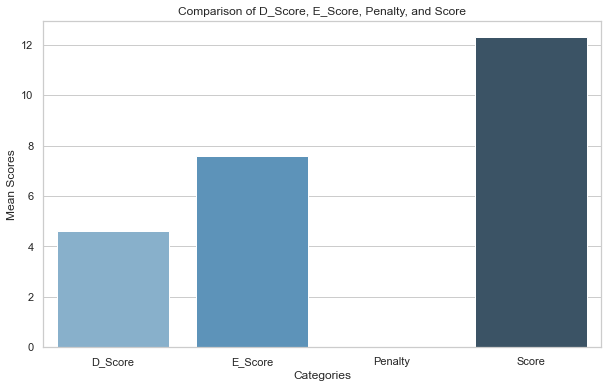

In [92]:
# Create a bar plot to compare D_Score, E_Score, Penalty, and Score
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=['D_Score', 'E_Score', 'Penalty', 'Score'],
            y=[df_cleaned['D_Score'].mean(), df_cleaned['E_Score'].mean(), df_cleaned['Penalty'].mean(), df_cleaned['Score'].mean()],
            palette="Blues_d")
plt.xlabel("Categories")
plt.ylabel("Mean Scores")
plt.title("Comparison of D_Score, E_Score, Penalty, and Score")

plt.show()

In [98]:
df_cleaned

,Country,Name,Gender,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
98,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",BB,100.0,4.8,6.200,0.0,11.000
99,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",FX,109.0,4.4,7.466,0.1,11.766
100,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",UB,52.0,4.8,8.000,0.0,12.800
101,EGY,Jana ABDELSALAM,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",VT1,110.0,4.2,8.433,0.3,12.333
102,EGY,Jana ABDELSALAM,w,2009-03-12 20:23:00,World Cup,qual,"Baku, Azerbaijan",BB,22.0,4.8,6.733,0.0,11.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11962,AUS,NaN,w,NaT,2022 51st FIG Artistic Gymnastics World Champi...,qual,"Liverpool, England",UB,17.0,5.6,8.466,0.0,14.066
11963,AUS,NaN,w,NaT,BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",BB,1.0,5.1,8.366,0.0,13.466
11964,AUS,NaN,w,NaT,BIRMINGHAM 2022 Commonwealth Games,qual,"Birmingham, England",BB,5.0,5.0,7.950,0.0,12.950
11965,AUS,NaN,w,NaT,BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",UB,7.0,5.3,7.233,0.0,12.533


In [101]:
grouped = df_cleaned.groupby('Date').agg({'D_Score': 'mean', 'E_Score': 'mean'}).reset_index()


In [102]:
grouped

,Date,D_Score,E_Score
0,2001-03-04 20:23:00,4.679433,7.695887
1,2001-06-04 20:23:00,4.495833,7.766142
2,2001-08-05 20:23:00,4.479412,7.801757
3,2008-06-11 20:23:00,4.486093,7.853318
4,2009-03-12 20:23:00,4.627957,7.637489
5,2011-04-16 20:23:00,4.698917,7.670135
6,2011-08-14 20:22:00,4.672408,7.760195
7,2017-03-19 20:23:00,4.890395,7.734424
8,2023-02-26 20:23:00,4.666667,7.767877
9,2023-03-26 20:23:00,4.392040,4.807711


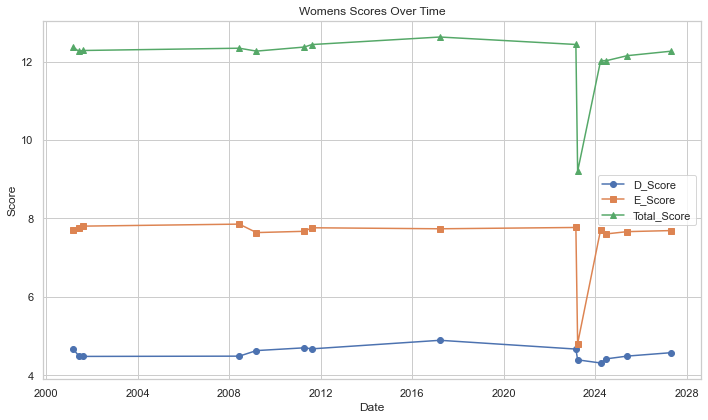

In [103]:
# WOMEN

# Calculate total score
grouped['Total_Score'] = grouped['D_Score'] + grouped['E_Score']

# Create a line plot using .values
plt.figure(figsize=(10, 6))
plt.plot(grouped['Date'].values, grouped['D_Score'].values, label='D_Score', marker='o')
plt.plot(grouped['Date'].values, grouped['E_Score'].values, label='E_Score', marker='s')
plt.plot(grouped['Date'].values, grouped['Total_Score'].values, label='Total_Score', marker='^')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Womens Scores Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

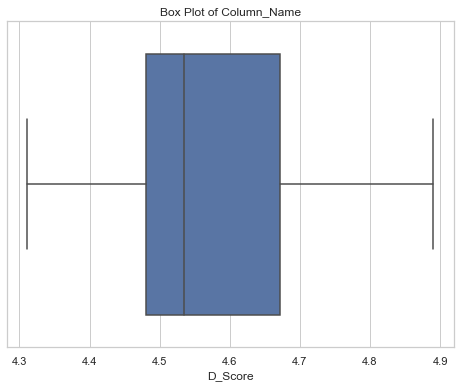

In [104]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=grouped['D_Score'])
plt.title('Box Plot of Column_Name')

plt.show()

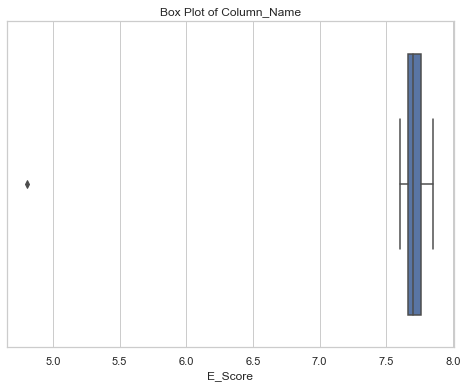

In [105]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=grouped['E_Score'])
plt.title('Box Plot of Column_Name')

plt.show()

In [106]:
grouped[grouped['E_Score'] <= 5]

,Date,D_Score,E_Score,Total_Score
9,2023-03-26 20:23:00,4.39204,4.807711,9.199751


In [109]:
grouped[grouped['D_Score'] <= 4.4]

,Date,D_Score,E_Score,Total_Score
9,2023-03-26 20:23:00,4.39204,4.807711,9.199751
10,2024-03-27 20:22:00,4.31145,7.710878,12.022328


In [110]:
grouped.iloc[9]

Date           2023-03-26 20:23:00
D_Score                    4.39204
E_Score                   4.807711
Total_Score               9.199751
Name: 9, dtype: object

In [112]:
# Remove the selected row from the DataFrame
grouped = grouped.drop(9)

In [114]:
grouped = grouped.drop(10)
grouped

,Date,D_Score,E_Score,Total_Score
0,2001-03-04 20:23:00,4.679433,7.695887,12.375319
1,2001-06-04 20:23:00,4.495833,7.766142,12.261975
2,2001-08-05 20:23:00,4.479412,7.801757,12.281169
3,2008-06-11 20:23:00,4.486093,7.853318,12.339411
4,2009-03-12 20:23:00,4.627957,7.637489,12.265446
5,2011-04-16 20:23:00,4.698917,7.670135,12.369052
6,2011-08-14 20:22:00,4.672408,7.760195,12.432603
7,2017-03-19 20:23:00,4.890395,7.734424,12.624819
8,2023-02-26 20:23:00,4.666667,7.767877,12.434544
11,2024-06-28 20:23:00,4.417672,7.604095,12.021767


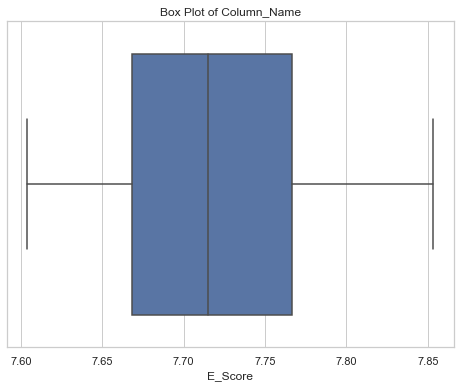

In [115]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=grouped['E_Score'])
plt.title('Box Plot of Column_Name')

plt.show()

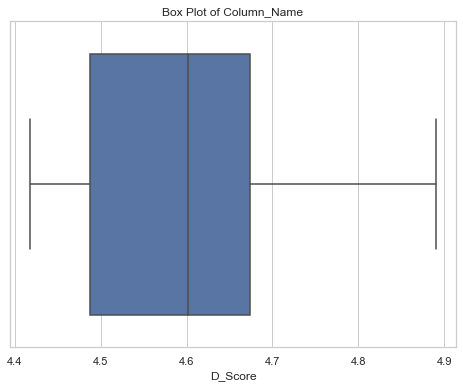

In [116]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=grouped['D_Score'])
plt.title('Box Plot of Column_Name')

plt.show()

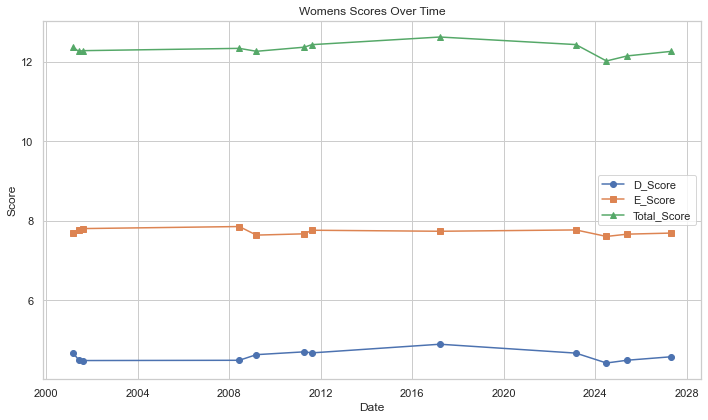

In [117]:
# WOMEN

# Calculate total score
grouped['Total_Score'] = grouped['D_Score'] + grouped['E_Score']

# Create a line plot using .values
plt.figure(figsize=(10, 6))
plt.plot(grouped['Date'].values, grouped['D_Score'].values, label='D_Score', marker='o')
plt.plot(grouped['Date'].values, grouped['E_Score'].values, label='E_Score', marker='s')
plt.plot(grouped['Date'].values, grouped['Total_Score'].values, label='Total_Score', marker='^')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Womens Scores Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

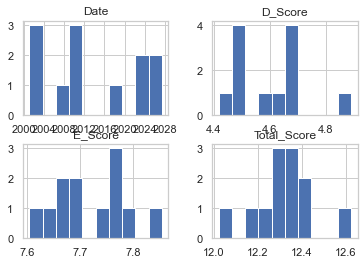

In [119]:
from matplotlib import pyplot

grouped.hist()
pyplot.show()

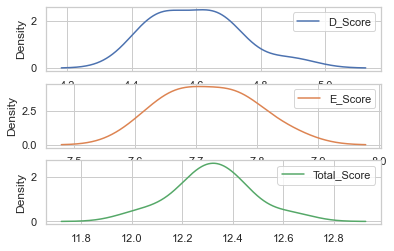

In [125]:
data = grouped.drop(columns=["Date"])
data.plot(kind='density', subplots=True, layout=(3,1), sharex=False)
pyplot.show()

In [127]:
import numpy as np
import pandas as pd

In [130]:
data.columns

Index(['D_Score', 'E_Score', 'Total_Score'], dtype='object')

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_23498/2479189741.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax)


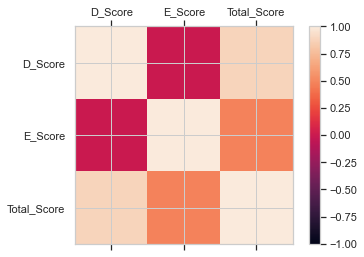

In [132]:
names = ['D_Score', 'E_Score', 'Total_Score']
correlations = data.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

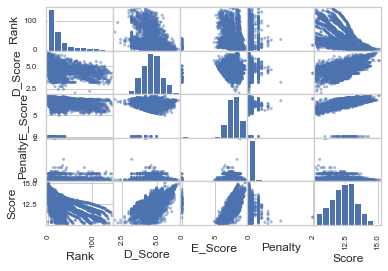

In [146]:
import pandas as pd
import numpy as np

names = ['D_Score', 'E_Score', 'Total_Score']
pd.plotting.scatter_matrix(df_cleaned)
pyplot.show()

ValueError: too many values to unpack (expected 2)

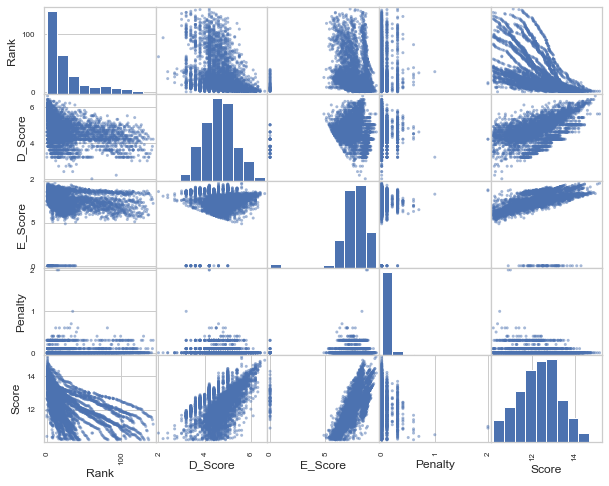

In [149]:
# Set a larger figure size
fig, axes = pd.plotting.scatter_matrix(df_cleaned, figsize=(10, 8))

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()

In [155]:
import joypy



In [156]:
df_cleaned.columns

Index(['Country', 'Name', 'Gender', 'Date', 'Competition', 'Round', 'Location',
       'Apparatus', 'Rank', 'D_Score', 'E_Score', 'Penalty', 'Score'],
      dtype='object')

In [160]:
dat = df_cleaned.drop(columns=["Country", "Name", "Gender", "Date", "Competition", "Round",
                              "Location", "Apparatus"])

In [163]:
dat.columns

Index(['Rank', 'D_Score', 'E_Score', 'Penalty', 'Score'], dtype='object')

IndexError: list index out of range

<Figure size 800x160 with 0 Axes>

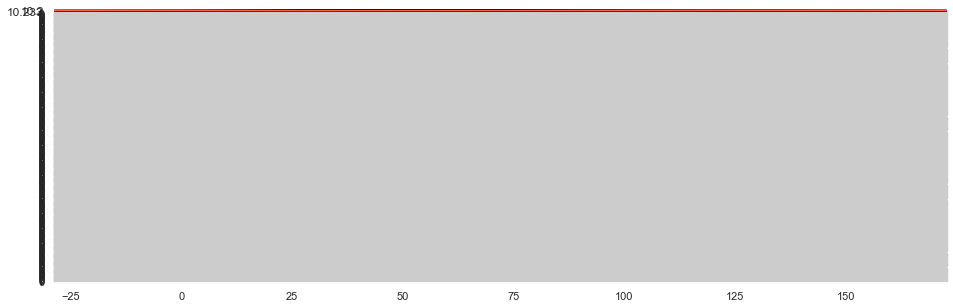

In [168]:
# varbls = ['Country', 'Name', 'Gender', 'Date', 'Competition', 'Round', 'Location',
#        'Apparatus', 'Rank', 'D_Score', 'E_Score', 'Penalty', 'Score']

varbls=['Rank', 'D_Score', 'E_Score', 'Penalty', 'Score']


plt.figure(figsize=(10,2), dpi= 80)
for i,var in enumerate(varbls):
    joypy.joyplot(dat, column=[var], by="Score", ylim='own', figsize=(16,5), color=['tomato', 'purple']);
    plt.title(f"{var} by 'Score'", fontsize=22)
plt.show()

<Figure size 800x160 with 0 Axes>

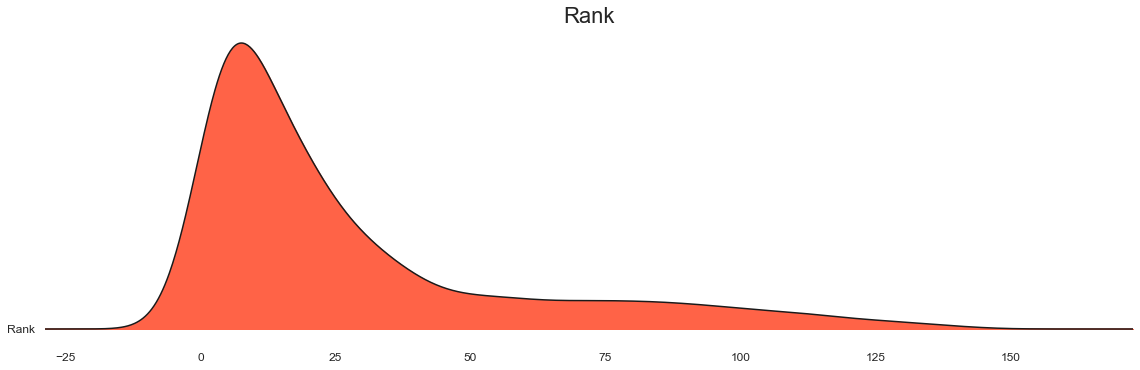

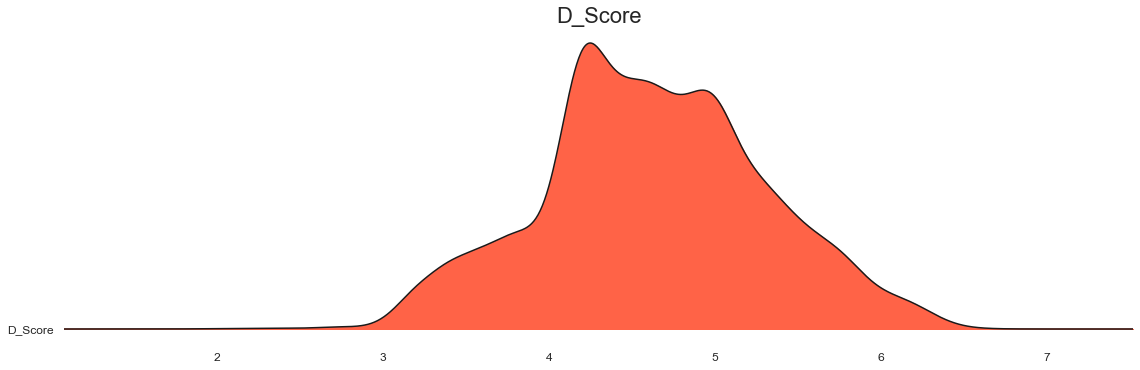

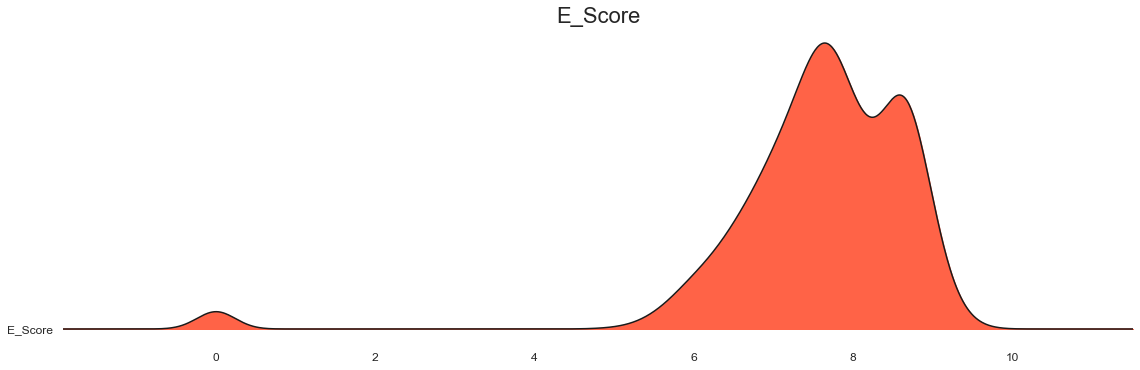

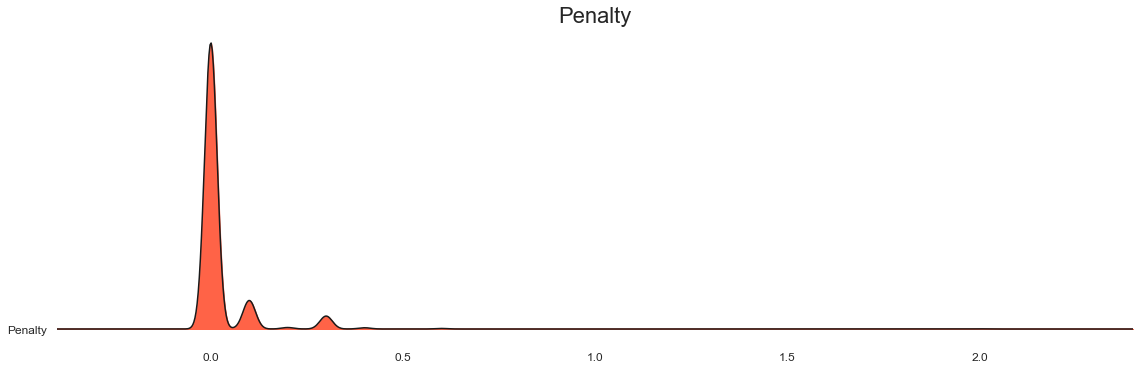

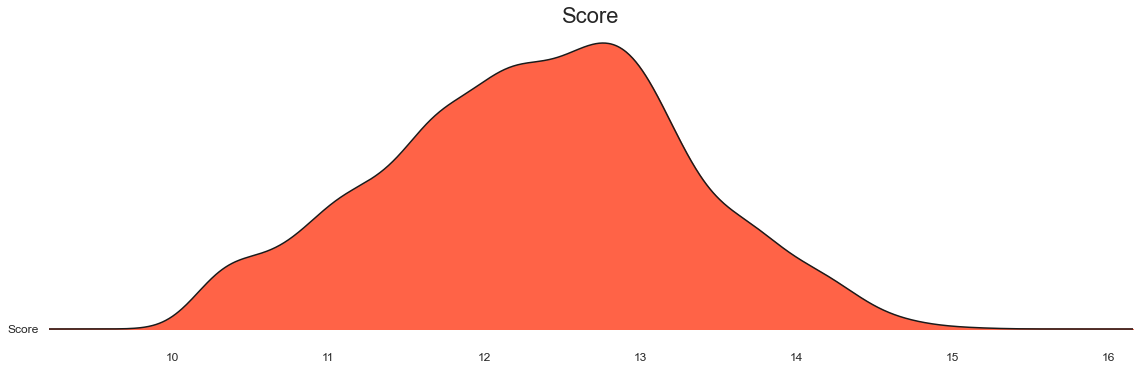

In [164]:
varbls=['Rank', 'D_Score', 'E_Score', 'Penalty', 'Score']

plt.figure(figsize=(10, 2), dpi=80)

for i, var in enumerate(varbls):
    joypy.joyplot(dat, column=[var], ylim='own', figsize=(16, 5), color='tomato')
    plt.title(f"{var}", fontsize=22)

plt.show()


/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (17.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (9.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (3.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (0.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (0.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (0.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (0.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (0.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (0.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (10.466) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (10.5) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (10.55) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/ana

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (11.7) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (11.75) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (11.76) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anac

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (13.067) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (13.25) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (13.33) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/an

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (14.35) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (14.433) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (14.5) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/ryantalbot/opt/ana

<Figure size 800x160 with 0 Axes>

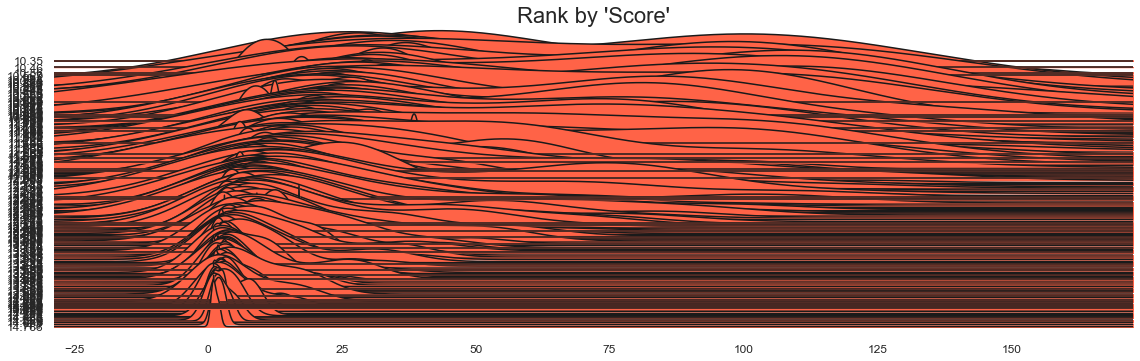

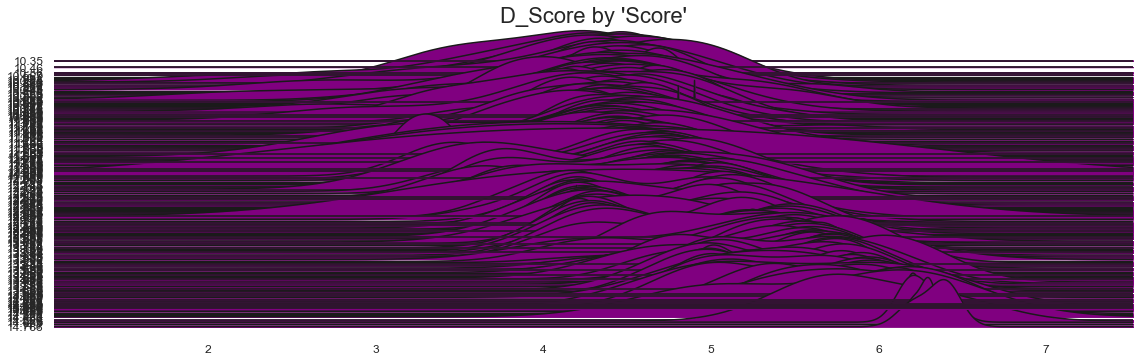

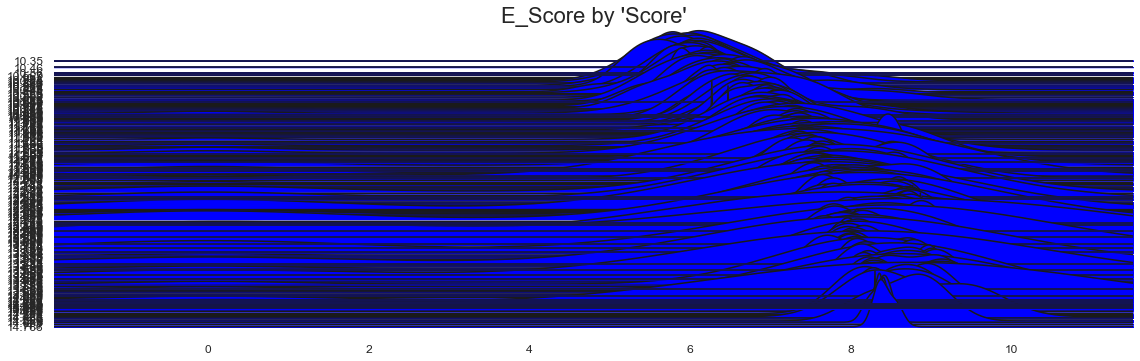

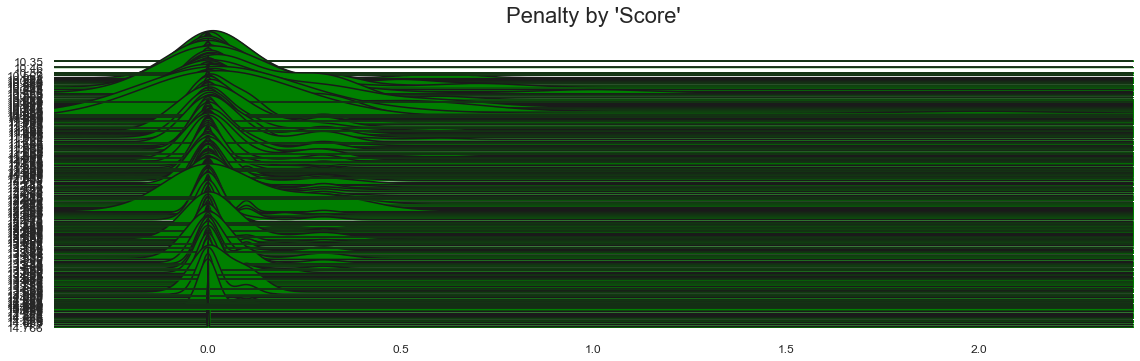

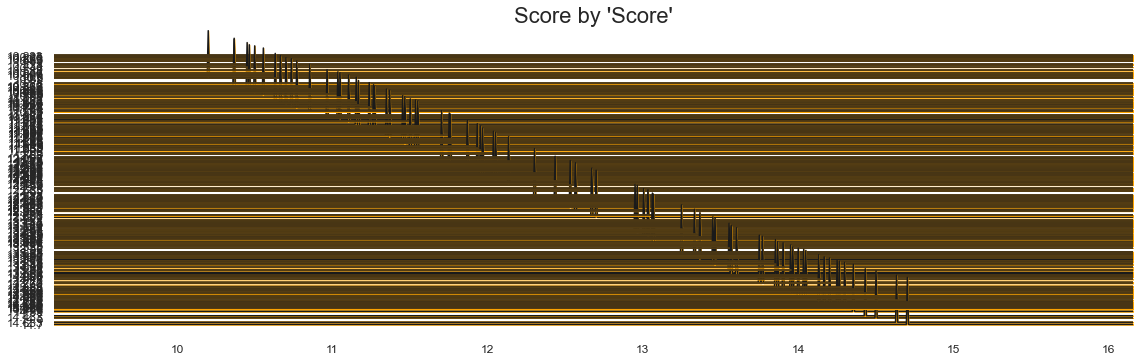

In [170]:
varbls = ['Rank', 'D_Score', 'E_Score', 'Penalty', 'Score']

# Define a color list with enough colors for the variables
colors = ['tomato', 'purple', 'blue', 'green', 'orange']

plt.figure(figsize=(10, 2), dpi=80)

for i, var in enumerate(varbls):
    joypy.joyplot(dat, column=[var], by="Score", ylim='own', figsize=(16, 5), color=colors[i]);
    plt.title(f"{var} by 'Score'", fontsize=22)

plt.show()


In [180]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4249 entries, 98 to 11966
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     4249 non-null   float64
 1   D_Score  4249 non-null   float64
 2   E_Score  4249 non-null   float64
 3   Penalty  4249 non-null   float64
 4   Score    4249 non-null   float64
dtypes: float64(5)
memory usage: 199.2 KB
